<a href="https://colab.research.google.com/github/frctlprdx/Plate-Number-Recognition/blob/main/Crop_Vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Instalasi Ultralytics YOLO
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 44.0 MB/s eta 0:00:00


In [ ]:
# Impor YOLO
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Muat model YOLOv8
model = YOLO('yolov8n.pt')  # Anda bisa mengganti dengan 'yolov8s.pt' atau model lain jika diperlukan

100%|██████████| 6.25M/6.25M [00:00<00:00, 311MB/s]



0: 384x640 7 persons, 4 cars, 3 motorcycles, 1 truck, 130.8ms
Speed: 3.0ms preprocess, 130.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


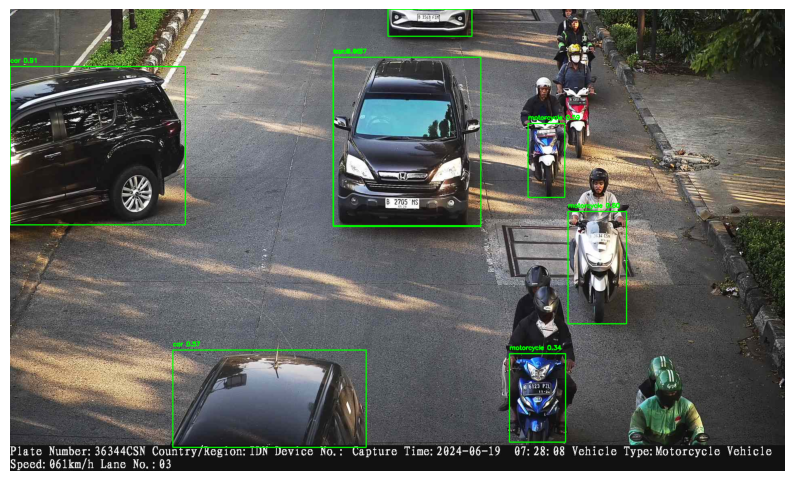

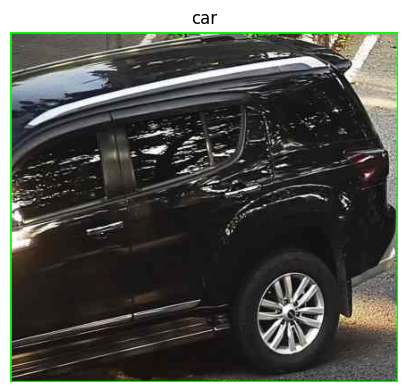

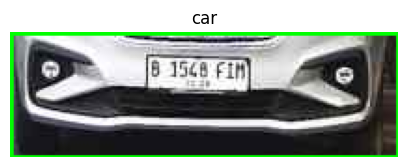

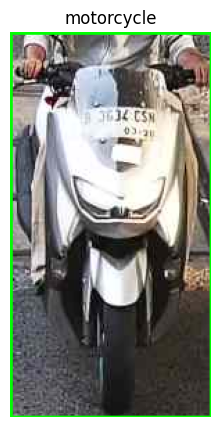

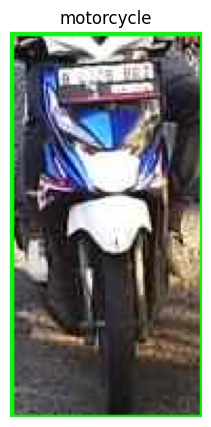

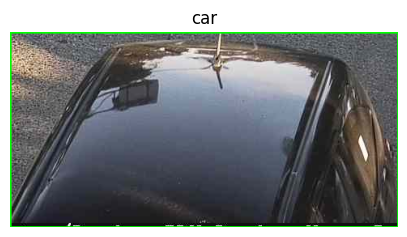

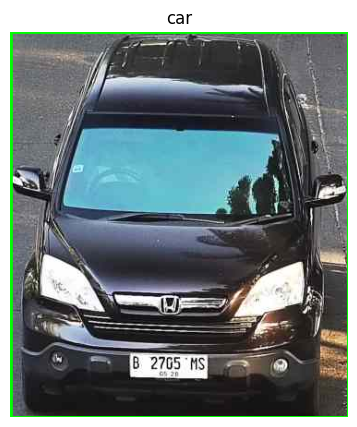

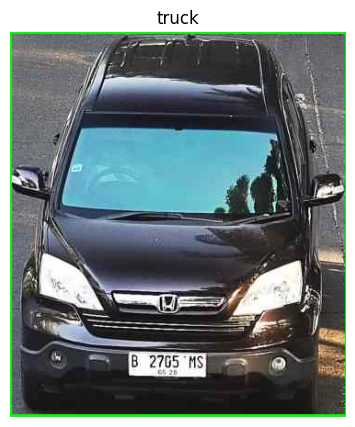

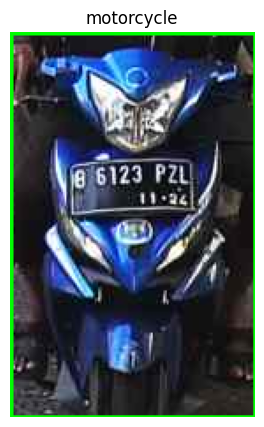

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


# Muat model YOLO
model = YOLO('yolov8n.pt')  # Atau model lain yang Anda gunakan


def detect_crop_and_display(image_path):
    # Membaca gambar dengan OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Gagal membaca gambar.")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Jalankan deteksi dengan YOLO
    results = model.predict(image_rgb)

    # Variabel untuk melacak kendaraan yang dipotong
    detected_crops = []

    # Gambarkan bounding box untuk kendaraan dan lakukan crop
    for result in results[0].boxes:
        # Ambil bounding box, confidence dan ID kelas
        bbox = result.xyxy[0].cpu().numpy()  # Koordinat bounding box [x_min, y_min, x_max, y_max]
        class_id = int(result.cls[0].cpu().numpy())  # Ambil ID kelas
        confidence = result.conf[0].cpu().numpy()

        # Dapatkan nama kelas dari hasil deteksi
        class_name = model.names[class_id]

        # Hanya proses kendaraan seperti mobil, motor, bus dan truk
        if class_name in ['car', 'motorcycle', 'bus', 'truck']:
            # Gambarkan bounding box
            x_min, y_min, x_max, y_max = map(int, bbox)
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(image, f"{class_name} {confidence:.2f}",
                        (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Lakukan crop pada gambar sesuai dengan bounding box
            crop_img = image[y_min:y_max, x_min:x_max]  # Crop gambar berdasarkan bounding box
            detected_crops.append((class_name, crop_img))

    # Tampilkan gambar utama dengan bounding box
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Tampilkan setiap kendaraan yang sudah dipotong
    for idx, (vehicle_class, cropped_img) in enumerate(detected_crops):
        plt.figure(figsize=(5, 5))
        plt.title(f"{vehicle_class}")
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()


# Periksa path gambar
image_path = '/content/drive/MyDrive/Comvi/ANPR/Traffic/2.TL.Jembatan Merah/11.jpg'  # Ganti dengan path gambar Anda
detect_crop_and_display(image_path)



0: 640x544 1 car, 1 bus, 1 truck, 172.8ms
Speed: 4.5ms preprocess, 172.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


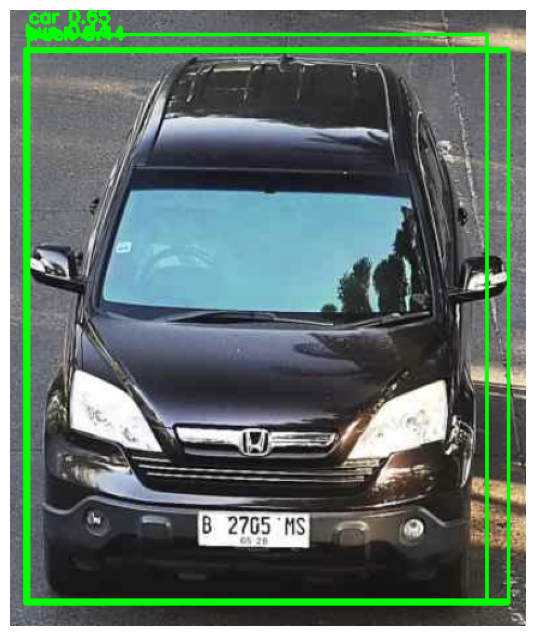

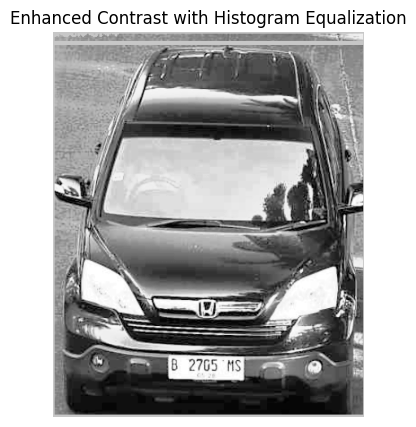

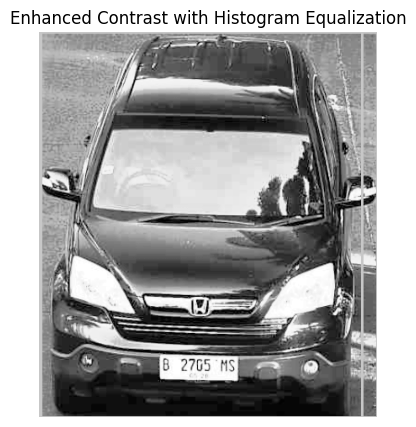

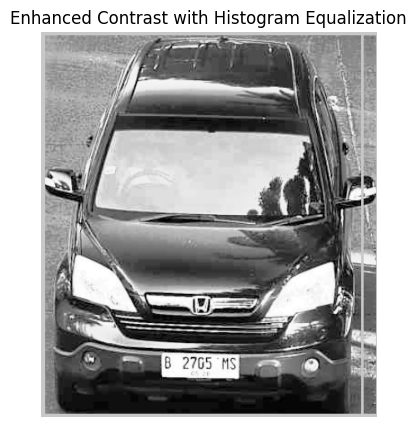

In [ ]:
import cv2
import matplotlib.pyplot as plt


def preprocess_plate(image):
    """
    Proses gambar agar lebih kontras dengan konversi ke grayscale dan histogram equalization.
    """
    # 1. Konversi ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 2. Terapkan Histogram Equalization untuk meningkatkan kontras
    enhanced_contrast = cv2.equalizeHist(gray)

    # Kembalikan hasil
    return enhanced_contrast


def detect_crop_and_display(image_path):
    # Membaca gambar dengan OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Gagal membaca gambar.")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Jalankan deteksi dengan YOLO
    results = model.predict(image_rgb)

    # Variabel untuk melacak kendaraan yang dipotong
    detected_crops = []

    # Gambarkan bounding box untuk kendaraan dan lakukan crop
    for result in results[0].boxes:
        # Ambil bounding box, confidence dan ID kelas
        bbox = result.xyxy[0].cpu().numpy()  # Koordinat bounding box [x_min, y_min, x_max, y_max]
        class_id = int(result.cls[0].cpu().numpy())  # Ambil ID kelas
        confidence = result.conf[0].cpu().numpy()

        # Dapatkan nama kelas dari hasil deteksi
        class_name = model.names[class_id]

        # Hanya proses kendaraan seperti mobil, motor, bus dan truk
        if class_name in ['car', 'motorcycle', 'bus', 'truck']:
            # Gambarkan bounding box
            x_min, y_min, x_max, y_max = map(int, bbox)
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(image, f"{class_name} {confidence:.2f}",
                        (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Lakukan crop pada gambar sesuai dengan bounding box
            crop_img = image[y_min:y_max, x_min:x_max]  # Crop gambar berdasarkan bounding box
            detected_crops.append(crop_img)

    # Tampilkan hasil gambar dengan bounding box
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Proses setiap kendaraan yang telah terdeteksi
    for idx, crop_img in enumerate(detected_crops):
        # Proses gambar dengan preprocessing untuk membuat tulisan lebih jelas
        preprocessed_img = preprocess_plate(crop_img)

        # Tampilkan hasil pemrosesan
        plt.figure(figsize=(10, 5))
        plt.title("Enhanced Contrast with Histogram Equalization")
        plt.imshow(preprocessed_img, cmap='gray')
        plt.axis('off')
        plt.show()


# Periksa path gambar
image_path = '/content/drive/MyDrive/Comvi/contohajalah.png'  # Ganti dengan path gambar Anda
detect_crop_and_display(image_path)


In [ ]:
import cv2
import numpy as np

# Baca gambar
image = cv2.imread('/content/drive/MyDrive/Comvi/ANPR/Traffic/2.TL.Jembatan Merah/11.jpg')

# Tingkatkan ketajaman
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(image, -1, kernel)

# Tingkatkan kontras
lab = cv2.cvtColor(sharpened, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl = clahe.apply(l)
limg = cv2.merge((cl, a, b))
enhanced_image = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# Terapkan denoising
denoised_image = cv2.fastNlMeansDenoisingColored(enhanced_image, None, 10, 10, 7, 21)

# Simpan gambar hasil
cv2.imwrite('/content/drive/MyDrive/gambar_denoised.jpg', denoised_image)


True